# Connect Gdrive

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Import Library

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap

In [60]:

#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report

# Import libarary confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.model_selection import train_test_split

# Import libarary Logistic Regression
from sklearn.linear_model import LogisticRegression

from sklearn import linear_model
from sklearn.linear_model import SGDClassifier

# Import libarary KNN
from sklearn.neighbors import KNeighborsClassifier

# Import Library Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Import libarary Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Brief Explanation Dataset

In [11]:
df = pd.read_csv('/content/drive/MyDrive/Microcredential/Bank_Marketing/df_clean.csv')
df.shape

(2212, 24)

In [12]:
df.sample(10)

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Clusters
887,0,57100.0,0,0,19,181,21,69,39,3,96,1,3,3,6,3,603,48,409,1,0,2,0,1
288,2,58821.0,0,1,44,513,14,154,19,0,28,1,9,2,9,6,361,65,728,1,1,3,1,0
1641,0,34916.0,2,0,89,51,23,82,33,0,42,4,5,1,3,9,570,53,231,1,2,4,1,2
1023,0,47703.0,0,1,95,359,0,134,13,26,123,4,6,3,8,5,556,68,655,1,1,3,1,0
1036,1,69098.0,0,0,82,1315,22,780,145,0,178,1,7,8,9,5,658,72,2440,1,0,2,0,3
802,0,65685.0,0,1,54,642,14,49,0,7,57,1,9,2,9,5,252,49,769,1,1,3,1,0
215,0,51537.0,0,1,27,787,20,204,0,0,92,3,2,2,11,8,815,69,1103,0,1,2,1,0
245,0,18701.0,1,1,95,12,4,2,10,6,10,4,2,0,4,5,609,57,44,0,2,3,1,2
67,1,60631.0,1,1,88,565,6,65,0,6,19,5,9,2,8,7,581,46,661,1,2,4,1,0
292,1,80950.0,0,0,44,525,147,112,219,147,63,1,6,7,9,2,618,60,1213,1,0,2,0,3


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int64  
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   i

In [14]:
ds = df.astype(int)

In [15]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Education            2212 non-null   int64
 1   Income               2212 non-null   int64
 2   Kidhome              2212 non-null   int64
 3   Teenhome             2212 non-null   int64
 4   Recency              2212 non-null   int64
 5   Wines                2212 non-null   int64
 6   Fruits               2212 non-null   int64
 7   Meat                 2212 non-null   int64
 8   Fish                 2212 non-null   int64
 9   Sweets               2212 non-null   int64
 10  Gold                 2212 non-null   int64
 11  NumDealsPurchases    2212 non-null   int64
 12  NumWebPurchases      2212 non-null   int64
 13  NumCatalogPurchases  2212 non-null   int64
 14  NumStorePurchases    2212 non-null   int64
 15  NumWebVisitsMonth    2212 non-null   int64
 16  Customer_For         221

## Feature Selection

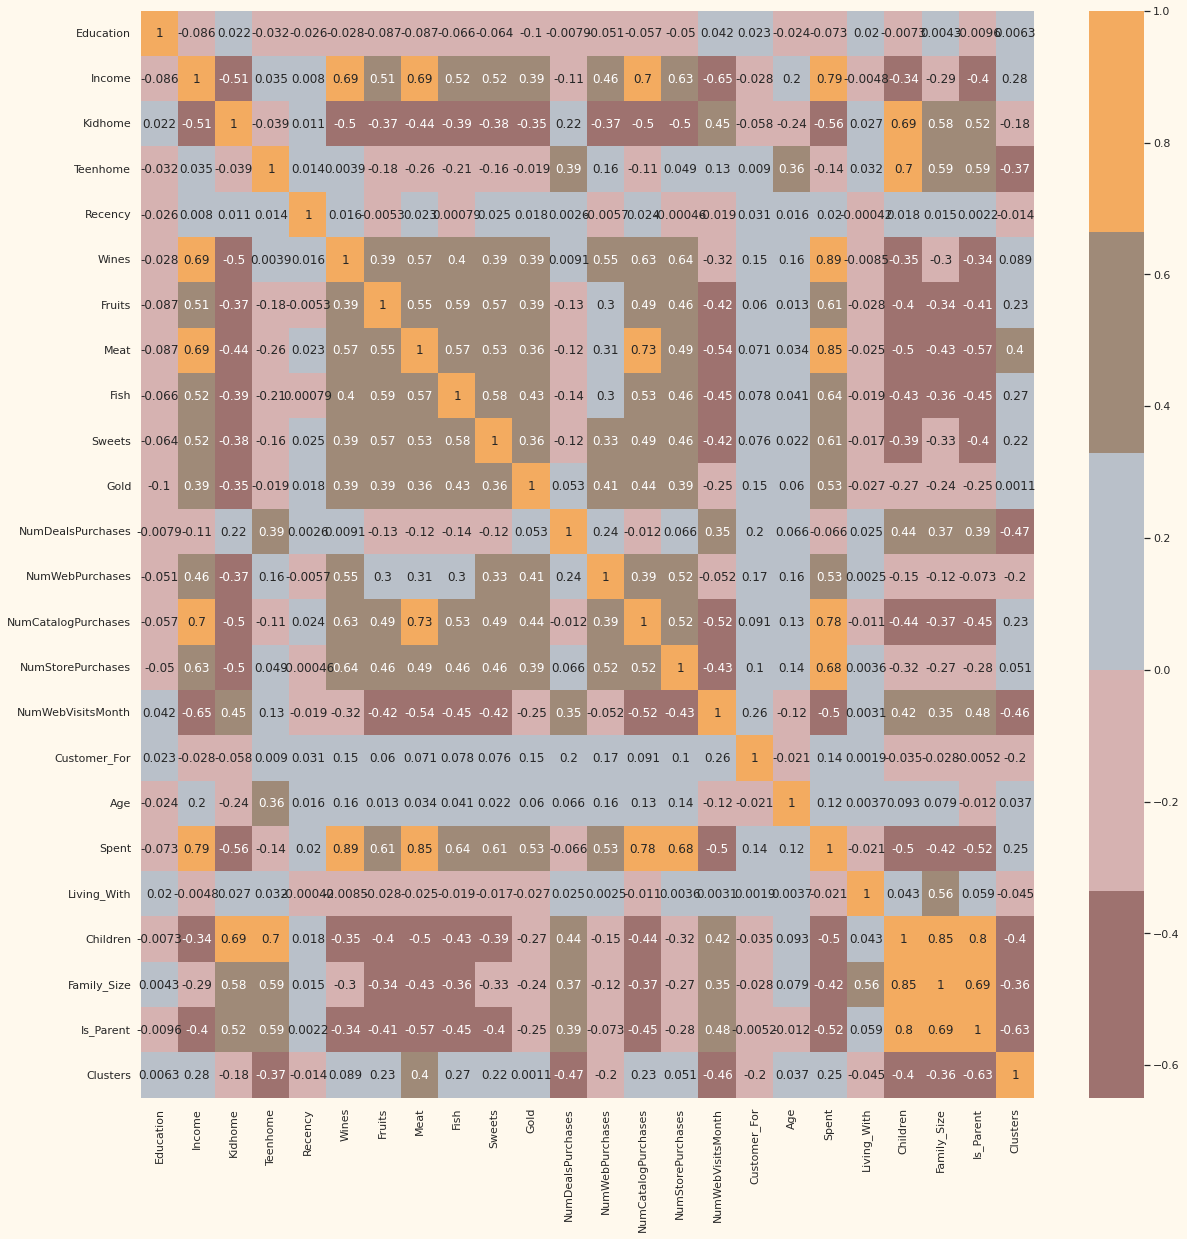

In [28]:
#correlation matrix
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

corrmat= ds.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

Pada penelitian kali ini, nilai correlation dikategorikan sebagai berikut:
1. Range -2 < x < 2 = Weak Correlation
2. Range -4 < x < 4 = Moderate Correlation
3. Range x < -4 atau x > 4 = Strong Correlation

Sehingga dapat dikatakan bahwa feature yang dapat digunakan adalah:

**Moderate Correlation**
1. Income - Positive
2. Children (Gabungan Teenhome dan Kidhome) - Negative
3. Spent (Gabungan Fruits, Meats, Fish dan Sweets) - Positive
4. NumWebPurchases - Negative
5. NumCatalogPurchases - Positive
6. Family_Size - Negative
7. Customer_For - Negative

**Strong Correlation**
1. NumDealsPurchases - Negative
2. NumWebVisitsMonth - Negative
3. Is_Parent - Positive





> 



In [33]:
feature = ds[['Income', 'Is_Parent', 'Children', 'Family_Size', 'Customer_For',
              'NumWebVisitsMonth', 'NumWebPurchases', 'NumCatalogPurchases', 
              'NumDealsPurchases', 'Spent', 'Clusters']]

In [34]:
feature

,Income,Is_Parent,Children,Family_Size,Customer_For,NumWebVisitsMonth,NumWebPurchases,NumCatalogPurchases,NumDealsPurchases,Spent,Clusters
0,58138,0,0,1,971,7,8,10,3,1617,3
1,46344,1,2,3,125,5,1,1,2,27,2
2,71613,0,0,2,472,4,8,2,1,776,3
3,26646,1,1,3,65,6,2,0,2,53,1
4,58293,1,1,3,321,5,5,3,5,422,2
...,...,...,...,...,...,...,...,...,...,...,...
2207,61223,1,1,3,541,5,9,3,2,1341,0
2208,64014,1,3,5,61,7,8,2,7,444,0
2209,56981,0,0,1,315,6,2,3,1,1241,3
2210,69245,1,1,3,316,3,6,5,2,843,0


# Pembuatan Model

In [35]:
# Feature
X = feature.iloc[:, :-1].values

# Target
y = feature.iloc[:, -1].values
y

array([3, 2, 3, ..., 3, 0, 0])

In [37]:
#Train and Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Logistic Regression

In [74]:
logreg = LogisticRegression(solver = 'lbfgs', max_iter=10000)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
accuracy_lr=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Logistic Regression\n',cm)
print('accuracy_Logistic Regression : %.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision)
print('recall_Logistic Regression: %.3f' %recall)
print('f1-score_Logistic Regression : %.3f' %f1)

Confusion matrix for Logistic Regression
 [[99  4 11  4]
 [ 1 93 22  2]
 [ 5 17 88  0]
 [ 6  2  0 89]]
accuracy_Logistic Regression : 0.833
precision_Logistic Regression : 0.833
recall_Logistic Regression: 0.833
f1-score_Logistic Regression : 0.833


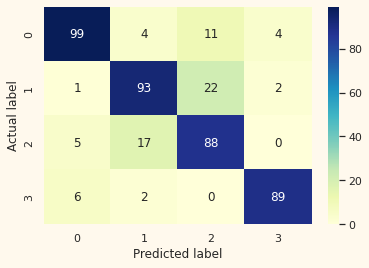

In [76]:
from sklearn import metrics
cm = confusion_matrix(y_test, Y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

## KNN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


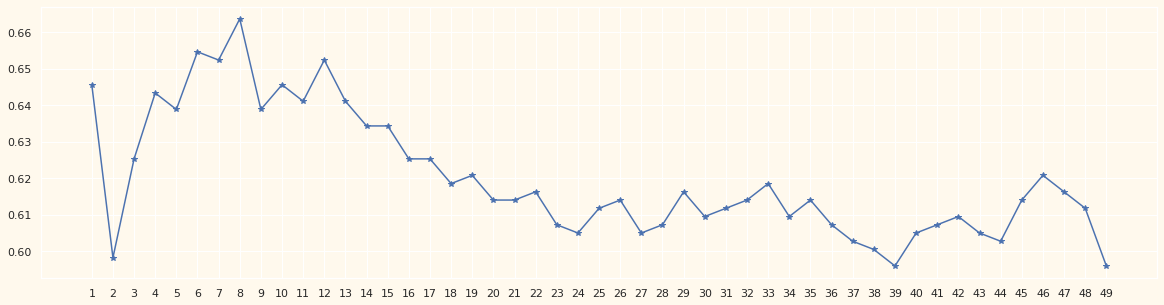

In [77]:
plt.subplots(figsize=(20,5))
a_index=list(range(1,50))
a=pd.Series()
x=range(1,50)
#x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,50)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train, y_train) 
    prediction=model.predict(X_test)
    a=a.append(pd.Series(accuracy_score(y_test,prediction)))
plt.plot(a_index, a,marker="*")
plt.xticks(x)
plt.show()

In [78]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test) 
accuracy_knn = round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

Confusion matrix for KNN
 [[83  4 11 20]
 [ 5 94 19  0]
 [13 34 63  0]
 [39  1  3 54]]
accuracy_KNN : 0.664
precision_KNN : 0.664
recall_KNN: 0.664
f1-score_KNN : 0.664


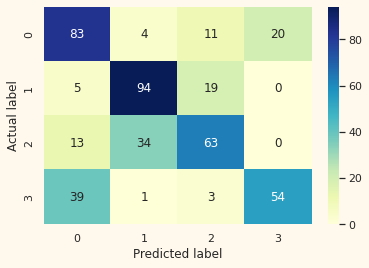

In [79]:
from sklearn import metrics
cm = confusion_matrix(y_test, Y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

## Gaussian Naive Bayes

In [80]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[ 96   0  14   8]
 [  2 106   6   4]
 [  5  28  77   0]
 [  7   0   2  88]]
accuracy_Naive Bayes: 0.828
precision_Naive Bayes: 0.828
recall_Naive Bayes: 0.828
f1-score_Naive Bayes : 0.828


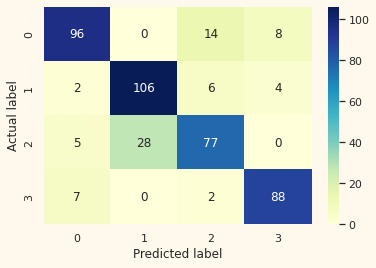

In [81]:
from sklearn import metrics
cm = confusion_matrix(y_test, Y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

## Random Forest

In [72]:
random_forest = RandomForestClassifier(n_estimators=300)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_prediction)
accuracy = accuracy_score(y_test,Y_prediction)
precision = precision_score(y_test, Y_prediction,average='micro')
recall =  recall_score(y_test, Y_prediction,average='micro')
f1 = f1_score(y_test,Y_prediction,average='micro')
print('Confusion matrix for Random Forest\n',cm)
print('accuracy_random_Forest : %.3f' %accuracy)
print('precision_random_Forest : %.3f' %precision)
print('recall_random_Forest : %.3f' %recall)
print('f1-score_random_Forest : %.3f' %f1)

Confusion matrix for Random Forest
 [[113   1   4   0]
 [  0 107   9   2]
 [  3   4 103   0]
 [  1   1   0  95]]
accuracy_random_Forest : 0.944
precision_random_Forest : 0.944
recall_random_Forest : 0.944
f1-score_random_Forest : 0.944


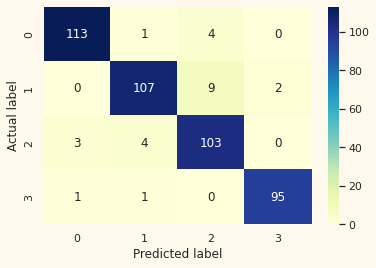

In [73]:
from sklearn import metrics
cm = confusion_matrix(y_test, Y_prediction)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.show()

## Decision Tree

In [82]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test) 
accuracy_dt=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision = precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

Confusion matrix for DecisionTree
 [[106   1  10   1]
 [  1  99  16   2]
 [  5  11  94   0]
 [  1   2   1  93]]
accuracy_DecisionTree: 0.885
precision_DecisionTree: 0.885
recall_DecisionTree: 0.885
f1-score_DecisionTree : 0.885


Text(0.5, 12.5, 'Predicted label')

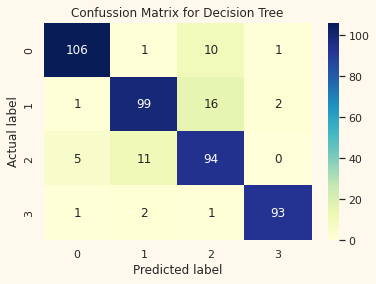

In [83]:
from sklearn import metrics
cdt = confusion_matrix(y_test, Y_pred)
p = sns.heatmap(pd.DataFrame(cdt), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confussion Matrix for Decision Tree')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## XGBoost

In [87]:
from xgboost import XGBClassifier

#Trying different depths
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print("Testing depths:")
for a in depths:
    model_xgbc = XGBClassifier(max_depth=a, objective="multi:softmax", num_class=4, random_state=0).fit(X_train, y_train)
    y_preds_train = model_xgbc.predict(X_train)
    y_preds_test = model_xgbc.predict(X_test)
    accuracy_train = accuracy_score(y_train, y_preds_train)
    accuracy_test = accuracy_score(y_test, y_preds_test)
    precision_train = precision_score(y_train, y_preds_train, average="weighted")
    precision_test = precision_score(y_test, y_preds_test, average="weighted")
    recall_train = recall_score(y_train, y_preds_train, average="weighted")
    recall_test = recall_score(y_test, y_preds_test, average="weighted")
    f1_train = f1_score(y_train, y_preds_train, average="weighted")
    f1_test = f1_score(y_test, y_preds_test, average="weighted")
    print("Train: Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_train, precision_train, recall_train, f1_train))
    print("Test : Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(a, accuracy_test, precision_test, recall_test, f1_test))
print("")

Testing depths:
Train: Depth:1, Accuracy:0.917, Precision:0.918, Recall:0.917, F1:0.916
Test : Depth:1, Accuracy:0.914, Precision:0.914, Recall:0.914, F1:0.914
Train: Depth:2, Accuracy:0.952, Precision:0.952, Recall:0.952, F1:0.952
Test : Depth:2, Accuracy:0.932, Precision:0.933, Recall:0.932, F1:0.932
Train: Depth:3, Accuracy:0.961, Precision:0.961, Recall:0.961, F1:0.961
Test : Depth:3, Accuracy:0.926, Precision:0.926, Recall:0.926, F1:0.926
Train: Depth:4, Accuracy:0.977, Precision:0.977, Recall:0.977, F1:0.977
Test : Depth:4, Accuracy:0.923, Precision:0.924, Recall:0.923, F1:0.923
Train: Depth:5, Accuracy:0.991, Precision:0.991, Recall:0.991, F1:0.991
Test : Depth:5, Accuracy:0.935, Precision:0.935, Recall:0.935, F1:0.935
Train: Depth:6, Accuracy:0.997, Precision:0.997, Recall:0.997, F1:0.997
Test : Depth:6, Accuracy:0.928, Precision:0.929, Recall:0.928, F1:0.928
Train: Depth:7, Accuracy:0.999, Precision:0.999, Recall:0.999, F1:0.999
Test : Depth:7, Accuracy:0.937, Precision:0.938,

Chosen depth:
Train: Depth:2, Accuracy:0.952, Precision:0.952, Recall:0.952, F1:0.952
Test : Depth:2, Accuracy:0.932, Precision:0.933, Recall:0.932, F1:0.932

Confusion matrix:
Predicted    0    1   2   3
Actual                     
0          113    1   4   0
1            0  107   9   2
2            4    7  99   0
3            1    2   0  94, 



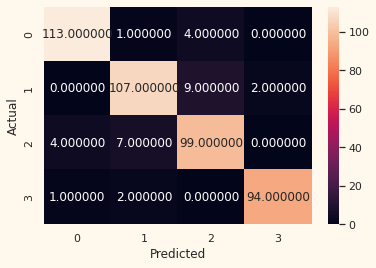

In [88]:
#Choosing the best depth
chosen_depth = 2
model_xgbc = XGBClassifier(max_depth=chosen_depth, objective="multi:softmax", num_class=4, random_state=0).fit(X_train, y_train)
y_preds_train = model_xgbc.predict(X_train)
y_preds_test = model_xgbc.predict(X_test)
accuracy_train = accuracy_score(y_train, y_preds_train)
accuracy_test = accuracy_score(y_test, y_preds_test)
precision_train = precision_score(y_train, y_preds_train, average="weighted")
precision_test = precision_score(y_test, y_preds_test, average="weighted")
recall_train = recall_score(y_train, y_preds_train, average="weighted")
recall_test = recall_score(y_test, y_preds_test, average="weighted")
f1_train = f1_score(y_train, y_preds_train, average="weighted")
f1_test = f1_score(y_test, y_preds_test, average="weighted")
print("Chosen depth:")
print("Train: Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_depth, accuracy_train, precision_train, recall_train, f1_train))
print("Test : Depth:{0:,.0f}, Accuracy:{1:,.3f}, Precision:{2:,.3f}, Recall:{3:,.3f}, F1:{4:,.3f}".format(chosen_depth, accuracy_test, precision_test, recall_test, f1_test))
print("\nConfusion matrix:")
confusion_matrix = pd.crosstab(y_test, y_preds_test, rownames=["Actual"], colnames=["Predicted"])
print(f"{confusion_matrix}, \n")
sns.heatmap(confusion_matrix, annot=True, fmt='0f')

# Choosing Model

In [101]:
results = pd.DataFrame({
    'Model': [ 'KNN', 
              'Logistic Regression',
              'Naive Bayes',  
              'Random Forest',
              'Decision Tree',
              'XGBoost'],
    "Accuracy_score":[accuracy_knn,
                      accuracy_lr,
                      accuracy_nb,
                      accuracy_rf,
                      accuracy_dt,
                      round(accuracy_test * 100, 2),
                     ]})

result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(9)

,Model,Accuracy_score
0,Random Forest,94.36
1,XGBoost,93.23
2,Decision Tree,88.49
3,Logistic Regression,83.30
4,Naive Bayes,82.84
5,KNN,66.37


Berdasarkan data diatas maka model yang akan digunakan adalah model Random Forest